In [47]:
#import nltk; nltk.download('stopwords')

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [48]:
df = pd.read_csv('C:/Users/seeml/Desktop/losalamosdata.csv', error_bad_lines = False)
#print(df.target_names.unique())

len(df)

419744

In [49]:
# just considering the users in source_user@domain

users_df = df[df['source_user@domain'].str.contains("U")]
users_df = users_df[-users_df['source_user@domain'].str.contains("ANONYMOUS")]
users_df = users_df[-users_df['destination_computer'].str.contains("U|TGT")]
users_df = users_df[['time', 'destination_computer', 'source_user@domain']]
users_df['source_user@domain'] = users_df['source_user@domain'].str.split('@').str.get(0)

users_df

,time,destination_computer,source_user@domain
9,1254860,C2805,U2552
10,24716,C1877,U2521
27,26627,C2327,U581
32,2981235,C2721,U4995
34,3238561,C1025,U5195
42,2359124,C2058,U2398
44,35124,C743,U6230
45,26344,C2327,U2973
46,726075,C2327,U6239
51,115497,C528,U3174


In [120]:
users_df['source_user@domain'].value_counts()

U6836     6750
U1653     2849
U7998      815
U1723      483
U66        436
U4281      370
U3771      280
U748       247
U293       242
U463       241
U254       238
U636       231
U737       217
U525       204
U5002      202
U1718      198
U726       195
U307       194
U8849      189
U1430      188
U1916      187
U1592      184
U1522      183
U8601      183
U162       180
U667       176
U12043     173
U194       169
U3635      166
U1506      161
          ... 
U11051       1
U6980        1
U10496       1
U1002        1
U8372        1
U6345        1
U8281        1
U7234        1
U9491        1
U11835       1
U10066       1
U10136       1
U6221        1
U2994        1
U11151       1
U5800        1
U9770        1
U5253        1
U10107       1
U7110        1
U6327        1
U6254        1
U8526        1
U11543       1
U10523       1
U11369       1
U11925       1
U6735        1
U11585       1
U11202       1
Name: source_user@domain, Length: 9964, dtype: int64

In [125]:
users_df[users_df['source_user@domain'].str.contains("U4281")]['destination_computer'].value_counts()

C1152     39
C1877     32
C585      31
C4784     31
C2553     31
C3573     30
C743      30
C4747     24
C2519     16
C2651     14
C528       7
C1025      7
C625       7
C457       6
C586       5
C1065      5
C3173      4
C8799      4
C529       4
C1640      4
C612       4
C467       3
C2106      2
C423       1
C25511     1
C108       1
C23346     1
C2327      1
C10876     1
C22085     1
C21949     1
C21718     1
C15475     1
C21592     1
C22852     1
C25038     1
C20548     1
C4313      1
C24306     1
C23055     1
C20664     1
C21109     1
C25120     1
C25727     1
C24759     1
C20413     1
C25483     1
C26090     1
C21318     1
C92        1
C25828     1
C24432     1
C10        1
Name: destination_computer, dtype: int64

In [ ]:
#"U1723|U1653|U66"

In [50]:
users_df1 = users_df[users_df['source_user@domain'].str.contains("U1723|U1653|U66")]

#users_df[users_df['source_user@domain'].str.contains("U66")]['destination_computer'].value_counts()

In [51]:
##ignore those computer that occur less than 5 times
users_df1['comp_count'] = users_df1.groupby('destination_computer')['destination_computer'].transform('count')
bots = users_df1[users_df1['comp_count'] >= 5]
comp_num = bots['destination_computer'].nunique()
bots

C:\Users\seeml\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,time,destination_computer,source_user@domain,comp_count
125,2910779,C1025,U6630,56
165,3056451,C5666,U1653,2728
419,116991,C16818,U6631,8
441,2901918,C5666,U1653,2728
467,3110403,C5666,U1653,2728
664,3054865,C5666,U1653,2728
998,3082659,C5666,U1653,2728
1018,687200,C754,U1653,37
1027,3058128,C5666,U1653,2728
1358,1182962,C5666,U1653,2728


In [52]:
# Create a corpus, each element represents one day of connections 

sec_day = 86400
corpus = []
for i in range(57):
    day = (bots["time"] <= sec_day*(i+1)) & (bots["time"] > sec_day*i)
    list = bots[day][['destination_computer']]
    corpus.append(list)



In [53]:
# transform the dataframe into array
users_df_list=[]
for i in range(57):
    a = [x for xs in corpus[i].values for x in xs]
    users_df_list.append(a)




In [54]:
users_df_list

[['C612',
  'C625',
  'C585',
  'C2327',
  'C457',
  'C1759',
  'C2106',
  'C1877',
  'C1877',
  'C585',
  'C1877',
  'C2327',
  'C2327',
  'C2327',
  'C529',
  'C585',
  'C2327',
  'C2525',
  'C2553',
  'C1790',
  'C1877',
  'C2327',
  'C743',
  'C586',
  'C585',
  'C2553',
  'C2327',
  'C5716',
  'C1065',
  'C585',
  'C2553',
  'C1640',
  'C2106',
  'C585',
  'C1056',
  'C743',
  'C2327',
  'C2327',
  'C2106',
  'C625',
  'C2553',
  'C586',
  'C1640',
  'C2327',
  'C2553',
  'C2327',
  'C2553',
  'C2489',
  'C529',
  'C2553',
  'C586',
  'C504',
  'C1640',
  'C2327',
  'C5716',
  'C2327',
  'C2327',
  'C706',
  'C586',
  'C1640',
  'C2327',
  'C585',
  'C1640',
  'C529',
  'C1877',
  'C1003',
  'C1003',
  'C1173',
  'C585',
  'C625',
  'C585',
  'C1640',
  'C528',
  'C585',
  'C2327',
  'C3468',
  'C625',
  'C2327',
  'C2327',
  'C2106',
  'C457',
  'C2162',
  'C586',
  'C423',
  'C743',
  'C529',
  'C528',
  'C1877',
  'C706',
  'C2327',
  'C2327',
  'C2327',
  'C2106',
  'C2327',
 

In [55]:
#create corpus
id2word = corpora.Dictionary(users_df_list)

texts = users_df_list

corpus1 = [id2word.doc2bow(text) for text in texts]

corpus1

[[(0, 3),
  (1, 7),
  (2, 3),
  (3, 11),
  (4, 3),
  (5, 12),
  (6, 3),
  (7, 4),
  (8, 17),
  (9, 12),
  (10, 3),
  (11, 3),
  (12, 4),
  (13, 4),
  (14, 64),
  (15, 3),
  (16, 4),
  (17, 28),
  (18, 1),
  (19, 4),
  (20, 3),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 6),
  (25, 4),
  (26, 1),
  (27, 4),
  (28, 9),
  (29, 3),
  (30, 1),
  (31, 11),
  (32, 27),
  (33, 16),
  (34, 12),
  (35, 10),
  (36, 4),
  (37, 27),
  (38, 2)],
 [(3, 3),
  (5, 3),
  (6, 1),
  (7, 3),
  (8, 5),
  (9, 4),
  (14, 3),
  (17, 2),
  (18, 1),
  (21, 1),
  (22, 1),
  (24, 4),
  (25, 5),
  (27, 6),
  (28, 6),
  (30, 1),
  (31, 1),
  (32, 5),
  (33, 4),
  (34, 4),
  (35, 4),
  (37, 6),
  (39, 1),
  (40, 1),
  (41, 2)],
 [(0, 3),
  (2, 2),
  (3, 2),
  (4, 2),
  (5, 2),
  (7, 1),
  (8, 2),
  (9, 3),
  (12, 3),
  (13, 2),
  (14, 1),
  (16, 2),
  (18, 1),
  (20, 1),
  (23, 1),
  (24, 1),
  (25, 2),
  (26, 2),
  (28, 3),
  (29, 2),
  (32, 2),
  (34, 2),
  (36, 1),
  (37, 1),
  (38, 2),
  (40, 2),
  (42, 1),
  (43, 1)

In [128]:
import numpy as np; np.random.seed(0)
freq_list = np.random.rand(58, comp_num)

In [76]:
#create an array to plot heatmap
for i in range(57):
    j = 0
    for k in range(len(corpus1[i])):
        while j < corpus1[i][k][0]:
            freq_list[i][j] = 0
            j += 1
        freq_list[i][j] = np.log(corpus1[i][k][1])
        j += 1
    while j <= comp_num-1:
        freq_list[i][j] = 0
        j += 1
                

            

Text(131,0.5,'documents(days)')

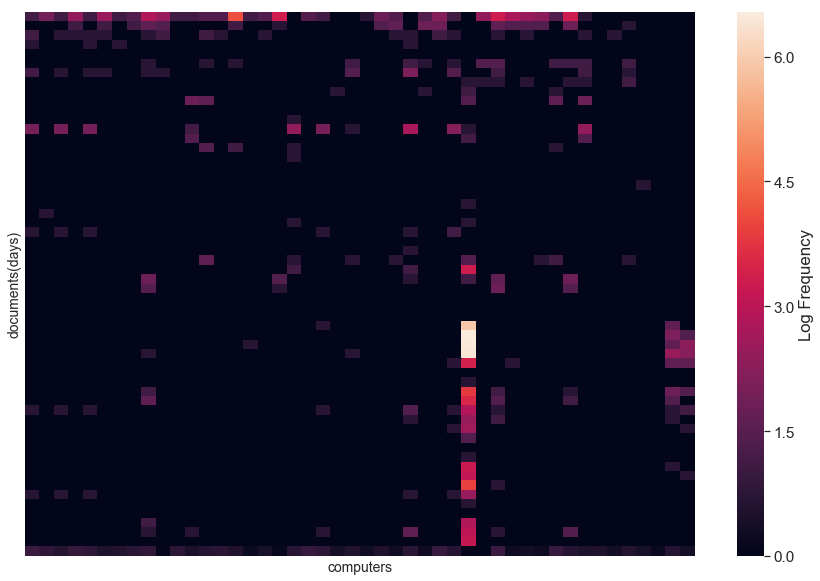

In [102]:
# heatmap

import seaborn as sns; sns.set()
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)
ax = sns.heatmap(freq_list,xticklabels=False, yticklabels=False, cbar_kws={'label': 'Log Frequency'})
axis_font = {'fontname':'Arial', 'size':'14'}
plt.xlabel('computers',**axis_font)
plt.ylabel('documents(days)',**axis_font)



In [103]:
##lda model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus1,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [104]:
pprint(lda_model.print_topics())
#"U1723|U1653|U66"
# 2:U1653 1: U1723 0:U66 

[(0,
  '0.119*"C2327" + 0.095*"C585" + 0.088*"C743" + 0.078*"C1877" + 0.068*"C2553" '
  '+ 0.041*"C586" + 0.036*"C1640" + 0.035*"C2106" + 0.034*"C5716" + '
  '0.033*"C612"'),
 (1,
  '0.118*"C504" + 0.074*"C2651" + 0.069*"C754" + 0.065*"C549" + 0.053*"C1003" '
  '+ 0.049*"C1173" + 0.047*"C1056" + 0.047*"C2173" + 0.044*"C231" + '
  '0.043*"C3468"'),
 (2,
  '0.944*"C5666" + 0.020*"C1025" + 0.015*"C8799" + 0.002*"C549" + '
  '0.001*"C1877" + 0.001*"C423" + 0.001*"C585" + 0.001*"C2327" + 0.001*"C743" '
  '+ 0.001*"C395"')]


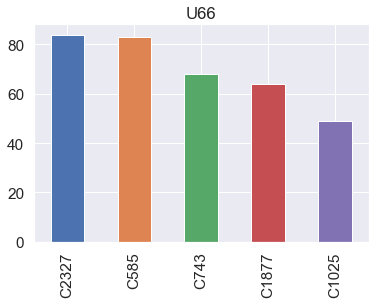

In [115]:
df1 = bots[bots['source_user@domain'].str.contains("U66")]['destination_computer'].value_counts()[:5]
df1.plot.bar(title = "U66")


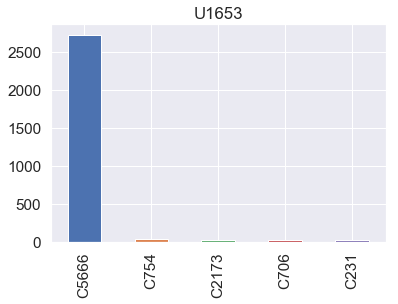

In [117]:
df2 = bots[bots['source_user@domain'].str.contains("U1653")]['destination_computer'].value_counts()[:5]
df2.plot.bar(title = "U1653")

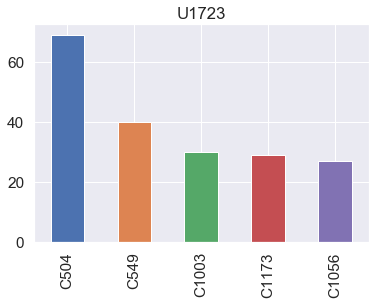

In [116]:
df3 = bots[bots['source_user@domain'].str.contains("U1723")]['destination_computer'].value_counts()[:5]
df3.plot.bar(title = "U1723")

In [118]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus1))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=users_df_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -1.331961929760535

Coherence Score:  0.6964091056550626


In [119]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus1, id2word)
vis

C:\Users\seeml\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.398054 -0.000059       1        1  71.834312
0      0.199156 -0.135828       2        1  16.066843
1      0.198898  0.135887       3        1  12.098845, topic_info=     Category         Freq    Term        Total  loglift  logprob
term                                                             
30    Default  2703.000000   C5666  2703.000000  30.0000  30.0000
14    Default    86.000000   C2327    86.000000  29.0000  29.0000
26    Default    59.000000    C504    59.000000  28.0000  28.0000
32    Default    82.000000    C585    82.000000  27.0000  27.0000
37    Default    68.000000    C743    68.000000  26.0000  26.0000
8     Default    64.000000   C1877    64.000000  25.0000  25.0000
17    Default    46.000000   C2553    46.000000  24.0000  24.0000
18    Default    39.000000   C2651    39.000000  23.0000  23.0000
38    Default    36.000000    C754    36.000000  22.0000  22.0000
29    Default    40.000000    C549    40.000000  21.0000  21.0000
0     Default    30.000000   C1003    30.000000  20.0000  20.0000
4     Default    28.000000   C1173    28.000000  19.0000  19.0000
11    Default    29.000000   C2173    29.000000  18.0000  18.0000
2     Default    27.000000   C1056    27.000000  17.0000  17.0000
33    Default    28.000000    C586    28.000000  16.0000  16.0000
12    Default    26.000000    C231    26.000000  15.0000  15.0000
20    Default    26.000000   C3468    26.000000  14.0000  14.0000
36    Default    26.000000    C706    26.000000  13.0000  13.0000
5     Default    26.000000   C1640    26.000000  12.0000  12.0000
9     Default    26.000000   C2106    26.000000  11.0000  11.0000
22    Default    25.000000    C423    25.000000  10.0000  10.0000
31    Default    25.000000   C5716    25.000000   9.0000   9.0000
34    Default    27.000000    C612    27.000000   8.0000   8.0000
3     Default    23.000000   C1065    23.000000   7.0000   7.0000
28    Default    21.000000    C529    21.000000   6.0000   6.0000
35    Default    21.000000    C625    21.000000   5.0000   5.0000
41    Default    22.000000     C92    22.000000   4.0000   4.0000
27    Default    19.000000    C528    19.000000   3.0000   3.0000
24    Default    20.000000    C457    20.000000   2.0000   2.0000
25    Default    19.000000    C467    19.000000   1.0000   1.0000
...       ...          ...     ...          ...      ...      ...
0      Topic3    25.596344   C1003    30.618773   1.9329  -2.9305
4      Topic3    23.706139   C1173    28.719830   1.9202  -3.0072
2      Topic3    22.688026   C1056    27.774073   1.9098  -3.0511
12     Topic3    20.997013    C231    26.866777   1.8656  -3.1286
20     Topic3    20.682833   C3468    26.873737   1.8502  -3.1436
29     Topic3    31.010424    C549    40.303295   1.8500  -2.7386
11     Topic3    22.529902   C2173    29.769619   1.8334  -3.0581
36     Topic3    19.843584    C706    26.926590   1.8068  -3.1851
39     Topic3     4.871211  C16818     6.734951   1.7881  -4.5896
22     Topic3    16.575359    C423    25.081488   1.6978  -3.3650
40     Topic3     3.347037   C2331     5.815629   1.5596  -4.9649
41     Topic3    12.529392     C92    22.301323   1.5355  -3.6449
13     Topic3     6.338755   C2310    11.651592   1.5033  -4.3263
43     Topic3     3.250221    C395     6.805506   1.3731  -4.9942
16     Topic3     5.504428   C2525    11.694414   1.3585  -4.4674
23     Topic3     3.849078    C449     9.776244   1.1799  -4.8251
6      Topic3     3.785990   C1759    10.784803   1.0652  -4.8416
25     Topic3     6.165377    C467    19.649443   0.9530  -4.3540
7      Topic3     3.672986   C1790    13.781226   0.7898  -4.8719
24     Topic3     4.794435    C457    20.718609   0.6485  -4.6055
32     Topic3    18.983025    C585    82.877190   0.6382  -3.2294
15     Topic3     1.270729   C2489     6.911558   0.4185  -5.9334
35     Topic3     3.950814    C625    21.761763   0.4058 